In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
import seaborn as sns

import sys
sys.path.append('../../OtherFiles')

from Alexandria import plot

In [2]:
dats = []
for file in os.listdir("results_3"):
    dats.append(np.load("results_3/"+file, allow_pickle = 1).item())
    

In [3]:
plot.plot_loss_and_acc

<function Alexandria.plot.plot_loss_and_acc(loss, acc, title, runtype, log=False, ax1=None, text='')>

In [90]:
dat.keys()

dict_keys(['pretrain mode', 'pretrain losses', 'fine-tune losses', 'fine-tune accuracies'])

0
1
2
3
-1


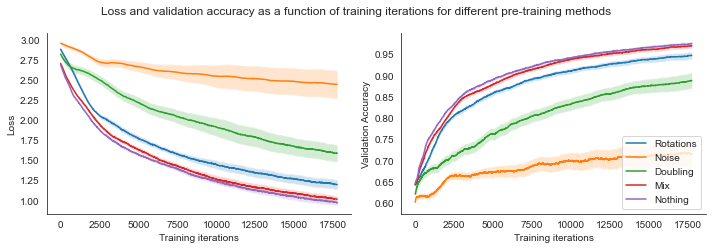

In [152]:
names = ["Rotations","Noise","Doubling", "Mix", "Nothing"]

fig, axs = plt.subplots(1,2,figsize=(10,3.5))
for i in range(5):

    print(dats[i*3]["pretrain mode"])
    loss, acc = [np.array(d["fine-tune losses"][:]) for d in dats[i*3:(i+1)*3]], [np.power(np.array(d["fine-tune accuracies"][:])*1.4,0.2) for d in dats[i*3:(i+1)*3]]
    # loss = [np.array(l[:-1] + l[1:])/2 for l in loss]
    # acc = [np.array(l[:-1] + l[1:])/2 for l in acc]
    N = 1000
    loss = [np.convolve(x, np.ones(N)/N, mode='valid') for x in loss]
    acc = [np.convolve(x, np.ones(N)/(N), mode='valid') for x in acc]
    # plot.plot_loss_and_acc(loss, acc,"wha", "whe")
    # print(dats[i*3]["pretrain mode"])
    # plt.plot(closs[1] ,label = str(dats[i*3]["pretrain mode"]))
    axs[0].plot(np.mean(loss,axis = 0),label = names[i])
    std =  np.sqrt(np.std(loss,axis = 0)/100)/np.maximum(0.4,(np.array([1-i/17500 for i in range(len(acc[0]))])))
    axs[0].fill_between([i for i in range(len(loss[0]))],np.mean(loss,axis = 0) - std, np.mean(loss,axis = 0)+std, alpha = 0.2)

    axs[1].plot([i for i in range(len(acc[0]))],np.mean(acc,axis = 0),label = names[i])
    std =  np.sqrt(np.std(acc,axis = 0)/100)/np.maximum(0.1,(1+np.array([1-i/17500 for i in range(len(acc[0]))])))

    axs[1].fill_between([i for i in range(len(acc[0]))], np.mean(acc,axis = 0) - std, np.mean(acc,axis = 0)+std, alpha = 0.2)

sns.despine()
plt.legend()

axs[0].set_xlabel("Training iterations")
axs[1].set_xlabel("Training iterations")
axs[1].set_ylabel("Validation Accuracy")

axs[0].set_ylabel("Loss")
fig.suptitle("Loss and validation accuracy as a function of training iterations for different pre-training methods")
fig.tight_layout()
plt.show()
